<a href="https://colab.research.google.com/github/UmutMD/pokemon-type-classification/blob/main/poke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

import os
from pathlib import Path
import re

import tensorflow as tf



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_dir = '/content/drive/MyDrive/Projects/Pokemon-Classification/images/images'

In [4]:
train_path = Path(train_dir)

In [16]:
files = list (train_path.glob('*.png'))
files
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]

image_df= pd.concat ([pd.Series(names, name = 'Name'), pd.Series(files, name ='Filepath').astype(str) ], axis= 1)

image_df['Name'] = image_df ['Name'].apply( lambda x: re.sub (r'\.\w+$','',x))


In [6]:
df = pd.read_csv ('/content/drive/MyDrive/Projects/Pokemon-Classification/pokemon.csv')
df



,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


Image augmentation



In [7]:
image_df

,Name,Filepath
0,accelgor,/content/drive/MyDrive/Projects/Pokemon-Classi...
1,abra,/content/drive/MyDrive/Projects/Pokemon-Classi...
2,aegislash-blade,/content/drive/MyDrive/Projects/Pokemon-Classi...
3,abomasnow,/content/drive/MyDrive/Projects/Pokemon-Classi...
4,absol,/content/drive/MyDrive/Projects/Pokemon-Classi...
...,...,...
716,whismur,/content/drive/MyDrive/Projects/Pokemon-Classi...
717,yanmega,/content/drive/MyDrive/Projects/Pokemon-Classi...
718,wynaut,/content/drive/MyDrive/Projects/Pokemon-Classi...
719,wingull,/content/drive/MyDrive/Projects/Pokemon-Classi...


In [8]:
train_df = image_df.merge(df, on= 'Name')
train_df

train_df = train_df.drop('Type2', axis=1)


In [9]:
train_df

,Name,Filepath,Type1
0,accelgor,/content/drive/MyDrive/Projects/Pokemon-Classi...,Bug
1,abra,/content/drive/MyDrive/Projects/Pokemon-Classi...,Psychic
2,aegislash-blade,/content/drive/MyDrive/Projects/Pokemon-Classi...,Steel
3,abomasnow,/content/drive/MyDrive/Projects/Pokemon-Classi...,Grass
4,absol,/content/drive/MyDrive/Projects/Pokemon-Classi...,Dark
...,...,...,...
716,whismur,/content/drive/MyDrive/Projects/Pokemon-Classi...,Normal
717,yanmega,/content/drive/MyDrive/Projects/Pokemon-Classi...,Bug
718,wynaut,/content/drive/MyDrive/Projects/Pokemon-Classi...,Psychic
719,wingull,/content/drive/MyDrive/Projects/Pokemon-Classi...,Water


In [10]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split =0.2,
    rescale = 1./255

)

In [21]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col= 'Filepath',
    y_col= 'Type1',
    target_size= (120,120),
    color_node = 'rgba',
    class_node ='sparse',
    batch_size = 32,
    shuffle= True,
    seed= 1,
    subset = 'training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col= 'Filepath',
    y_col= 'Type1',
    target_size= (120,120),
    color_node = 'rgba',
    class_node ='sparse',
    batch_size = 32,
    shuffle= True,
    seed= 1,
    subset = 'validation'


)

Found 577 validated image filenames belonging to 18 classes.
Found 144 validated image filenames belonging to 18 classes.


Finally solved 2 day error.......................


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


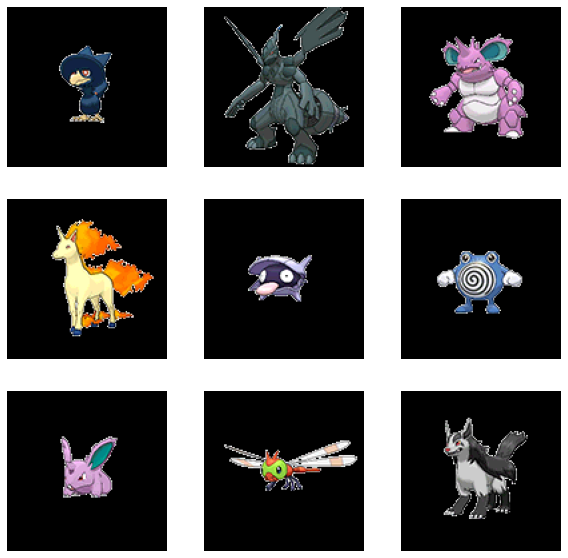

In [22]:
image_sample= train_data.next()[0]

plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(image_sample[i,:,:,:])
  plt.axis('off')
plt.show()